<a href="https://colab.research.google.com/github/dishui78157/ai/blob/rl/Image_Diffusion_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Generation Bot using Image Diffusion Models

Imagine that you are working in a marketing company, that builds an image generation bot for creating posters. As an ML engineer in the team, you are tasked with building an image generation bot, which takes user's poster queries as input, and returns images matching the query description as output. For example, for the query "Illustration of a fancy colorful bulb", the image to be generated may be

<figure>
<table>
<tr>
<td>
<img src='https://drive.google.com/uc?export=view&id=1GhoHOdkyzp7wdc3LgSe8BcF12tyTip0k' />
</td>
</tr>
</table>
</figure>


In a real scenario, you will collect a dataset of pairs of poster queries and corresponding images. These images may come from public datasets, or may be collected by a data team in your company, and annotated by the annotation team. You will then finetune an Image diffusion model using the collected images. You will collect evaluation datasets matching the use case, and evaluate the model on this dataset. You will continue doing "hill climbing" experiments, till you build a high quality model meeting the bar for shipping.

In this exercise, we will simply reuse a trained model available in HuggingFace. We will use the HugginFace pipeline to load the model and do inference with user queries.

## Installing dependencies

In [ ]:
!pip install diffusers transformers accelerate scipy safetensors

## Generating images using text to image models

In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.to('cuda')

prompt = "Corgi with a christmas cap"
generated_image = pipe(prompt).images[0]


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

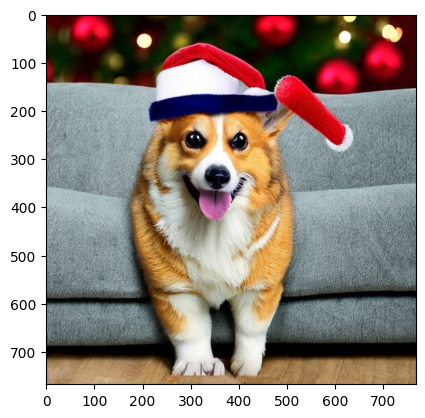

In [ ]:
from matplotlib import image
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
# Display the image
ax.imshow(generated_image)